<img src='11.jpg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cc-general/CC GENERAL.csv


In [3]:
#pip install pycaret

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('/kaggle/input/cc-general/CC GENERAL.csv')

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
from pycaret.clustering import*

In [9]:
setup(df)

,Description,Value
0,Session id,1368
1,Original data shape,"(8950, 18)"
2,Transformed data shape,"(8950, 8967)"
3,Numeric features,17
4,Categorical features,1
5,Rows with missing values,3.5%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [10]:
kmeans=create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4667,2692.6482,1.1011,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
plot_model(kmeans)

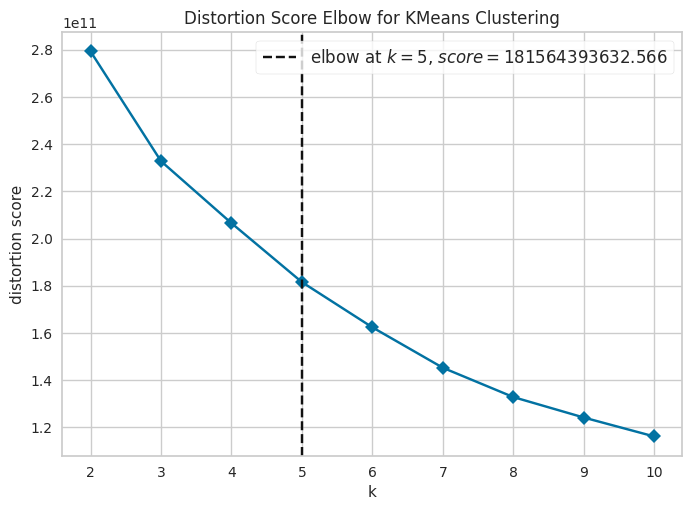

In [12]:
plot_model(kmeans,plot='elbow')

In [13]:
plot_model(kmeans,plot='tsne')

In [38]:
#Derste öğrendiğimiz Clustering modeline göre yaparsak

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod

In [17]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
x= df[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

In [25]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [28]:
model=KMeans(5)  #benzerliklerine göre 5 gruba ayıracağımızı tahmin ediyoruz

In [29]:
model=model.fit(x) #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

In [30]:
tahmin=model.predict(x)

In [31]:
silhouette_score(x,tahmin)

0.4561950612870877

In [33]:
x['cluster']=tahmin  #x in içnde yeni bir sütun açıp 'cluster' diye isimlendiriyoruz

In [34]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,cluster
0,40.900749,95.40,1000.0,3
1,3202.467416,0.00,7000.0,0
2,2495.148862,773.17,7500.0,0
4,817.714335,16.00,1200.0,3
5,1809.828751,1333.28,1800.0,3


Text(0, 0.5, 'CREDIT_LIMIT')

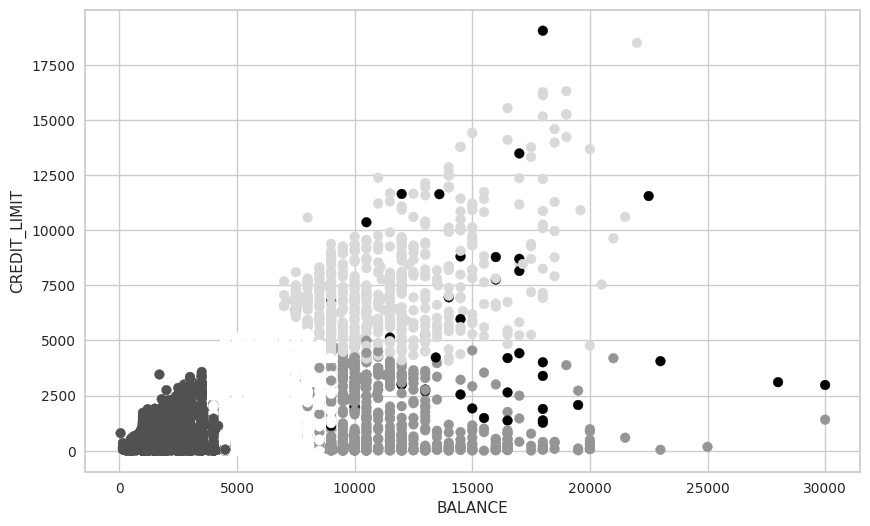

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x.CREDIT_LIMIT,x.BALANCE,c=tahmin); #x in değere göre 5 grupta tahminin grafiği, c= color
plt.xlabel("BALANCE")
plt.ylabel("CREDIT_LIMIT")

In [39]:
wcss=[]  #uzaklık
for i in range(1,10):            #veriyi en az ikiye ayırıyoruz ki gruplama olsun o yüzden 1 den başladık. 0 birinci grup
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #en optimum 

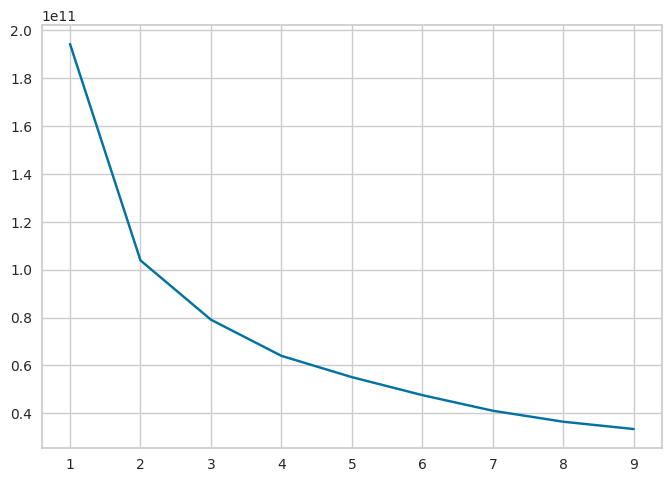

In [40]:
plt.plot(range(1,10),wcss)
#elbow dirsek metodu

In [41]:
pip install yellowbrick  ---veri görselleştirmeyi daha güzel yapan paket


Usage:   
  /opt/conda/bin/python3.10 -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/conda/bin/python3.10 -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/conda/bin/python3.10 -m pip install [options] [-e] <vcs project url> ...
  /opt/conda/bin/python3.10 -m pip install [options] [-e] <local project path> ...
  /opt/conda/bin/python3.10 -m pip install [options] <archive url/path> ...

no such option: ---veri
Note: you may need to restart the kernel to use updated packages.


In [42]:
from yellowbrick.cluster import KElbowVisualizer

In [43]:
km=KMeans()

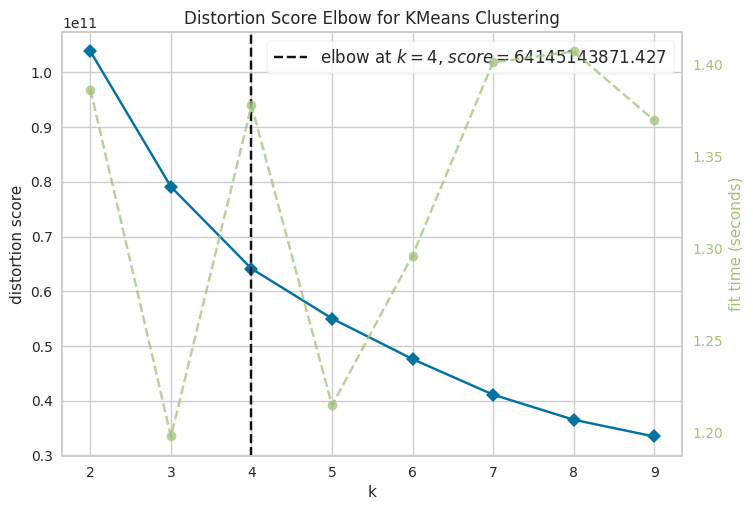

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor